# Principal Component Analysis (PCA)

PCA technique can be applied to reduce the number of dimensions in some data.
If a dataset has a large number of features, it is difficult to visualize them in the original measurement space.
However in the projection (eigenvectors) space, data can be represented meaningfully with the help of first few components.

Advantages
- Extract meaningful features by eliminating redundant (correlated) variables.
- Speed up the computation
- Less likely to overfit
- Help visualizing complex data

Disadvantages
- Original variables are lost
- PCA assumes principal components as the linear combination of original features, if this is not the case, PCA doesn't produce meaningful results

## PCA

- Consider $\bf X$ be the feature matrix of $n$ entries and $m$ features.

&NewLine;
&NewLine;
- Compute the eigen-pair $\mathbf \lambda$ and $\bf W$ of the covariance matrix $\bf X^T \bf X$.

&NewLine;
&NewLine;
- Transformed variables (scores) in full space: $\bf T$ = $\bf X\bf W$.

&NewLine;
&NewLine;
- $\bf W$ is called loading which has the dimension $m \times m$ and whose columns are the eigenvectors of the covariance matrix.

&NewLine;
&NewLine;
- Since $\bf X^T \bf X$ is symmetric, the eigenvectors are orthogonal. The eigenvalues correspond to the column vectors of $\bf W$ are $\lambda_i$, where $i=1,...,m$.

&NewLine;
&NewLine;
- Projection on r-dimensional subspace: $\bf T_{n\times r}$ = $\bf X_{n\times m}\bf W_{m\times r}$ for first $r$ principal components, where $r<m$.

## Singular Value Decomposition (SVD)

- Alternatively SVD can be applied to achieve similar results.

&NewLine;
&NewLine;
- SVD is computationally faster

In [392]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [393]:
df = pd.read_csv('iris.csv', index_col=0)

In [394]:
df.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [395]:
X = df.drop('Species', axis=1).values
y = df['Species'].values

In [396]:
X.shape, y.shape

((150, 4), (150,))

In [397]:
df.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

## Normalization

- Data set needs to be normalized, particularly in case of different measurement units for different features.

In [398]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_std = scaler.fit_transform(X)

## Eigen-decomposition

In [399]:
cov= np.cov(X_std.T) # Covariance matrix

In [400]:
print(cov)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [401]:
lamb, W = np.linalg.eig(cov)  # eigen-pair

In [402]:
print('Eigenvectors \n%s' %lamb)
print('\nEigenvalues \n%s' %W)

Eigenvectors 
[2.93808505 0.9201649  0.14774182 0.02085386]

Eigenvalues 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [403]:
# explained variance for individual principal components.

In [404]:
var_exp = [i/sum(lamb) for i in sorted(lamb, reverse=True)]

In [405]:
print(exp_var)

[0.72962445 0.22850762 0.03668922 0.00517871]


In [406]:
# Cumulative sum of eigenvalues
csum = np.cumsum(exp_var)

In [407]:
print(csum)

[0.72962445 0.95813207 0.99482129 1.        ]


#### Clearly it shows that 95.8% of variance can be explained by the first two principal components.

#### Plot explained variance

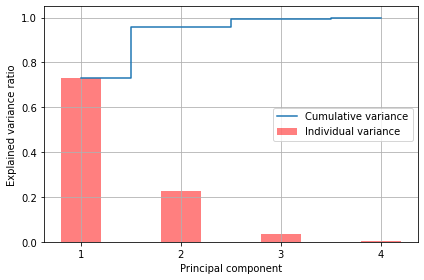

In [408]:
plt.bar(range(1,len(exp_var)+1), exp_var, alpha=0.5, align='center', width=0.4, label='Individual variance', color='red')
plt.step(range(1,len(csum)+1), csum, where='mid',label='Cumulative variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.grid()
plt.xticks([1,2,3,4])
plt.show()

## SVD analysis

In [409]:
U, Sigma, V = np.linalg.svd(X_std.T)

In [410]:
U

array([[-0.52106591, -0.37741762,  0.71956635,  0.26128628],
       [ 0.26934744, -0.92329566, -0.24438178, -0.12350962],
       [-0.5804131 , -0.02449161, -0.14212637, -0.80144925],
       [-0.56485654, -0.06694199, -0.63427274,  0.52359713]])

In [411]:
W # eigenvalues of covariance matrix is  the same as U

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [412]:
Sigma

array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

## Projection vector in low dimension space

The eigen vectors corresponds to first two components

In [413]:
Wr = W[:][:,0:2] # first two principal directions

In [414]:
Wr

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

### The new feature space

In [415]:
Tr = X_std.dot(Wr) # projection on 2D subspace

In [416]:
Tr[0:3]

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802]])

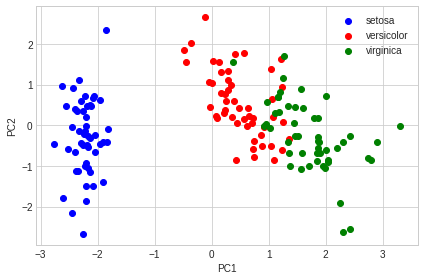

In [417]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('setosa', 'versicolor', 'virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Tr[y==lab, 0],
                    Tr[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

## Accuracy analysis

### Original data

In [418]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=2)

In [419]:
#from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

In [420]:
#model=XGBClassifier(param)
model=XGBClassifier()

In [421]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [422]:
# prediction
y_pred =model.predict(X_test)

In [423]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [424]:
cm0 = confusion_matrix(y_test, y_pred)

In [425]:
cm0

array([[14,  0,  0],
       [ 0,  7,  1],
       [ 0,  0,  8]])

In [426]:
ac0=accuracy_score(y_test, y_pred)

In [427]:
ac0

0.9666666666666667

### Two-component PCA accuracy

In [428]:
from sklearn.decomposition import PCA

In [429]:
X2_train, X2_test, y2_train, y2_test = train_test_split(Tr, y, test_size=0.2, random_state=2)

In [430]:
model.fit(X2_train, y2_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [431]:
# prediction
y2_pred =model.predict(X2_test)

In [432]:
# confusion matrix

In [433]:
cm2 = confusion_matrix(y2_test, y2_pred)

In [434]:
cm2

array([[14,  0,  0],
       [ 0,  7,  1],
       [ 0,  2,  6]])

In [390]:
ac2=accuracy_score(y2_test, y2_pred)

In [391]:
ac2

0.9

##### Training on original data, we have 96.67% accuracy, and on low-dimension space (PC=2 ), we have 90% accuracy